<a href="https://colab.research.google.com/github/princetonds/PDS-Movie-Competition/blob/main/PDS_Competition_Starter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the PDS Data Bowl!
### An introductory workshop to Princeton's first-ever data science competition
Authors: Joyce Luo (joyceluo@princeton.edu) & Nab Kar (nkar@princeton.edu)

This workshop aims to:

* help attendees get familiar with the competition format
* introduce the dataset and task
* get started with building their models

## Competition logistics
**Timeline**: The competition will run until May 1, at which point we will stop accepting submissions.

**Group size**: Students can work individually or teams of two. Finding a partner is recommended!

**Dataset**: The dataset consists of over 3,000 movies with pertinent information (“features”) about each movie. Some features are:

* Movie Budget
* Genre(s)
* Cast
* Crew
* Production company
* Tagline for the movie (if exists)

**Task**: Your task is to predict the movie’s revenue (in $) from all other features.

We will provide train data (*movies_data_public_train.csv*) which contains all features including movie revenues. We will also provide testing data (*movies_data_test.csv*) which contains all features *except* revenues. Your job will be to submit predicted revenues for this test set on the [EvalAI competition page](https://eval.ai/web/challenges/challenge-page/871/overview).

**Submission and Evaluation**:
Each movie in the dataset is associated with an ID. We ask you to submit your predictions for the test set in a CSV file with the format:

    MovieID, prediction
    MovieID, prediction

We’ll be evaluating your predictions using RMSLE, or Root Mean-Squared Log Error. This metric computes the squared difference between the log of your prediction and log of the actual value. Here’s the equation for RMSLE, where $\hat{y}_i$ is your prediction and $y_i$ is the actual value:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n \left(\log(\hat{y}_i+1) - \log(y_i+1)\right)^2}$$

*This next part is very important.* On the backend we’ve divided up the test set into a public and private test set. When you submit your predictions for the test set, you can either submit to the public or private leaderboard. Submitting to the public leaderboard allows you to see how you measure up to other participants, and you can submit up to ten times per day. However, your final score will be evaluated on the private leaderboard, for which you only have three submissions total. Do not forget to submit to the private leaderboard, but also use your submissions sparingly! The reason we do this is so that participants can’t “overfit” to the public leaderboard by constantly tweaking parameters of their model and resubmitting.

More details can be found on the [EvalAI competition site](https://eval.ai/web/challenges/challenge-page/871/overview).

**Prizes**: Prizes can be found at the [PDS competition page](https://princetonds.io/competition.html).

## Loading in the Data
We provided a training and testing set that you should load in to your notebook--it can found on [GitHub](https://github.com/princetonds/PDS-Movie-Competition). You should also import necessary packages for data cleaning here.

In [7]:
#!git clone https://github.com/princetonds/PDS-Movie-Competition

In [8]:
# imports important packages for data cleaning
import pandas as pd
import numpy as np

In [9]:
# loads in the training set and test set
df_train = pd.read_csv("./movies_data_public_train.csv")
df_test = pd.read_csv("./movies_data_test.csv")

Taking a quick look at the training data:

In [10]:
print(df_train.columns)
df_train.head()

Index(['Unnamed: 0', 'movie_id', 'budget', 'title', 'tagline', 'release_date',
       'runtime', 'genres', 'production_companies', 'production_countries',
       'popularity', 'revenue', 'vote_average', 'vote_count', 'cast', 'crew',
       'keywords', 'original_language', 'overview', 'spoken_languages'],
      dtype='object')


,Unnamed: 0,movie_id,budget,title,tagline,release_date,runtime,genres,production_companies,production_countries,popularity,revenue,vote_average,vote_count,cast,crew,keywords,original_language,overview,spoken_languages
0,0,116745,90000000,The Secret Life of Walter Mitty,"Stop Dreaming, Start Living",12/18/2013,114.0,"['Adventure', 'Comedy', 'Drama', 'Fantasy']","['New Line Cinema', 'Ingenious Media', 'Twenti...",['United States of America'],43.348022,188133322,7.0,3144,"['Ben Stiller', 'Kristen Wiig', 'Patton Oswalt...","['Ben Stiller', 'Ben Stiller', 'Stuart Cornfel...","['himalaya', 'photographer', 'magazine', 'icel...",en,A timid magazine photo manager who lives life ...,['English']
1,1,3291,7000000,"Good Night, and Good Luck.",They took on the Government with nothing but t...,9/16/2005,93.0,"['Drama', 'History']","['2929 Productions', 'Participant Productions'...","['France', 'Japan', 'United Kingdom', 'United ...",17.717681,54600000,6.8,273,"['David Strathairn', 'Jeff Daniels', 'Alex Bor...","['George Clooney', 'Grant Heslov']","['telecaster', 'communist', 'political activis...",en,"The story of journalist, Edward R Murrow's sta...",['English']
2,2,12498,1000000,Sling Blade,A simple man. A difficult choice.,8/30/1996,135.0,['Drama'],['Miramax Films'],['United States of America'],14.805264,24475416,7.4,231,"['Billy Bob Thornton', 'Dwight Yoakam', 'J. T....","['Billy Bob Thornton', 'David L. Bushell', 'Br...","['independent film', 'repair shop', 'southern'...",en,Karl Childers is a mentally disabled man who h...,['English']
3,3,312221,37000000,Creed,Your legacy is more than a name,11/25/2015,133.0,['Drama'],"['New Line Cinema', 'Warner Bros.', 'Metro-Gol...",['United States of America'],57.773583,173567581,7.3,1915,"['Michael B. Jordan', 'Sylvester Stallone', 'G...","['Irwin Winkler', 'Sylvester Stallone', 'Willi...","['underdog', 'sport', 'spin off', 'underground...",en,The former World Heavyweight Champion Rocky Ba...,['English']
4,4,9279,60000000,Jingle All the Way,"Two Dads, One Toy, No Prisoners.",11/15/1996,89.0,"['Family', 'Comedy']","['Twentieth Century Fox Film Corporation', '14...",['United States of America'],22.501041,129832389,5.5,575,"['Arnold Schwarzenegger', 'Phil Hartman', 'Sin...","['Chris Columbus', 'Mark Radcliffe', 'Brian Le...","['holiday', 'christmas party', 'santa claus', ...",en,"Meet Howard Langston, a salesman for a mattres...",['English']


The testing data looks similar but lacks the *revenue* column.

## Cleaning the Data

We provided some data cleaning examples to illustrate a possible way to clean the categorical data. Make sure to clean both the training and test set in the same way. We only cleaned certain columns, but if you want to use other columns, you should clean those as well as you see fit!


In [11]:
df_train["cast"]

0       ['Ben Stiller', 'Kristen Wiig', 'Patton Oswalt...
1       ['David Strathairn', 'Jeff Daniels', 'Alex Bor...
2       ['Billy Bob Thornton', 'Dwight Yoakam', 'J. T....
3       ['Michael B. Jordan', 'Sylvester Stallone', 'G...
4       ['Arnold Schwarzenegger', 'Phil Hartman', 'Sin...
                              ...                        
2152    ['Cuba Gooding Jr.', 'Ed Harris', 'Alfre Wooda...
2153    ['Jack Nicholson', 'Shelley Duvall', 'Danny Ll...
2154    ['Viggo Mortensen', 'Ed Harris', 'Renée Zellwe...
2155    ['Forest Whitaker', 'James McAvoy', 'Simon McB...
2156    ['Mark Wahlberg', 'Kate Beckinsale', 'Ben Fost...
Name: cast, Length: 2157, dtype: object

In [12]:
### TRAINING CLEANING
# gets first member of cast and puts in diff col
cast_list = []
# for each entry in the column "cast", get rid of excess characters
# and split the long string of cast members into an array
for i in range(len(df_train["cast"])): 
    cast = df_train["cast"].iloc[i]
    cast = cast.replace("'", "")
    cast = cast.replace('"', "")
    cast = cast.replace("[", "")
    cast = cast.replace("]", "")
    cast = cast.split(',')
    # get only the first member of the cast list
    cast_list.append(cast[0])

# put top cast members in new column
df_train["main_cast"] = cast_list

# Note: if you want to completely clean the cast column, you will need to do 
# some cleaning similar to "genres" show below

In [13]:
df_train["main_cast"]

0                 Ben Stiller
1            David Strathairn
2          Billy Bob Thornton
3           Michael B. Jordan
4       Arnold Schwarzenegger
                ...          
2152         Cuba Gooding Jr.
2153           Jack Nicholson
2154          Viggo Mortensen
2155          Forest Whitaker
2156            Mark Wahlberg
Name: main_cast, Length: 2157, dtype: object

We clean other textual features similarly.

In [14]:
# gets director (fist member of cast) and puts in diff col
crew_list = []
# for each entry in the column "crew", get rid of excess characters
# and split the long string of crew members into an array
for i in range(len(df_train["crew"])): 
    crew = df_train["crew"].iloc[i]
    crew = crew.replace("'", "") 
    crew = crew.replace('"', "")
    crew = crew.replace("[", "")
    crew = crew.replace("]", "")
    crew = crew.split(',')
    # get only first member of crew list, which is director
    crew_list.append(crew[0])
# put director in new column
df_train["director"] = crew_list

# cleans genres 
genres_list = []
# for each entry in the column "genres", get rid of excess characters
# and split the long string of genres into an array
for i in range(len(df_train["genres"])): 
    genres = df_train["genres"].iloc[i]
    genres = genres.replace("'", "") 
    genres = genres.replace("[", "")
    genres = genres.replace("]", "")
    genres = genres.split(',')
    # for each genre in the list, strip white spaces and add to new array
    array = []
    for gr in genres:
        gr = gr.strip()
        array.append(gr)
    genres_list.append(array) 
# replace "genres" column with cleaned list
df_train["genres"] = genres_list

# cleans production companies
comp_list = []
# for each entry in the column "production_companies", get rid of excess 
# characters and split the long string of companies into an array
for i in range(len(df_train["production_companies"])): 
    comp = df_train["production_companies"].iloc[i]
    comp = comp.replace("'", "") 
    comp = comp.replace("[", "")
    comp = comp.replace("]", "")
    comp = comp.split(',')
    # for each company in the list, strip white spaces and add to new array
    array = []
    for idx, co in enumerate(comp):
        if (idx < 5):
          co = co.strip()
          array.append(co)
    comp_list.append(array) 
# replace "production_companies" column with cleaned list
df_train["production_companies"] = comp_list

We also clean the testing data in a similar manner.

In [15]:
### TESTING CLEANING 
# gets first member of cast and puts in diff col
cast_list = []
# for each entry in the column "cast", get rid of excess characters
# and split the long string of cast members into an array
for i in range(len(df_test["cast"])): 
    cast = df_test["cast"].iloc[i]
    cast = cast.replace("'", "")
    cast = cast.replace('"', "")
    cast = cast.replace("[", "")
    cast = cast.replace("]", "")
    cast = cast.split(',')
    # get only the first member of the cast list
    cast_list.append(cast[0])
# put top cast members in new column
df_test["main_cast"] = cast_list
# Note: if you want to completely clean the cast column, you will need to do 
# some cleaning similar to "genres" show below

# gets director and puts in diff col
crew_list = []
# for each entry in the column "crew", get rid of excess characters
# and split the long string of crew members into an array
for i in range(len(df_test["crew"])): 
    crew = df_test["crew"].iloc[i]
    crew = crew.replace("'", "") 
    crew = crew.replace('"', "")
    crew = crew.replace("[", "")
    crew = crew.replace("]", "")
    crew = crew.split(',')
    # get only first member of crew list, which is director
    crew_list.append(crew[0])
# put director in new column
df_test["director"] = crew_list

# cleans genres 
genres_list = []
# for each entry in the column "genres", get rid of excess characters
# and split the long string of genres into an array
for i in range(len(df_test["genres"])): 
    genres = df_test["genres"].iloc[i]
    genres = genres.replace("'", "") 
    genres = genres.replace("[", "")
    genres = genres.replace("]", "")
    genres = genres.split(',')
    # for each genre in the list, strip white spaces and add to new array
    array = []
    for gr in genres:
        gr = gr.strip()
        array.append(gr)
    genres_list.append(array) 
# replace "genres" column with cleaned list
df_test["genres"] = genres_list

# cleans production companies
comp_list = []
# for each entry in the column "production_companies", get rid of excess 
# characters and split the long string of companies into an array
for i in range(len(df_test["production_companies"])): 
    comp = df_test["production_companies"].iloc[i]
    comp = comp.replace("'", "") 
    comp = comp.replace("[", "")
    comp = comp.replace("]", "")
    comp = comp.split(',')
    # for each company in the list, strip white spaces and add to new array
    array = []
    for idx, co in enumerate(comp):
        if (idx < 5):
          co = co.strip()
          array.append(co)
    comp_list.append(array) 
# replace "production_companies" column with cleaned list
df_test["production_companies"] = comp_list

## Basic Exploratory Data Analysis
Here we have done some basic EDA, so you can visualize the data and make decisions about your models based on this EDA. Feel free to do more EDA to visualize other variables. 

In [16]:
# imports data visualization packages
import seaborn
import matplotlib.pyplot as plt

In [17]:
df_train.describe()

,Unnamed: 0,movie_id,budget,runtime,popularity,revenue,vote_average,vote_count
count,2157.000000,2157.000000,2.157000e+03,2157.000000,2157.000000,2.157000e+03,2157.000000,2157.000000
mean,1078.000000,42509.092258,4.056228e+07,110.322670,29.541844,1.222264e+08,6.305192,995.296245
std,622.816586,71791.082456,4.510740e+07,20.387132,36.068661,1.836984e+08,0.873386,1447.196782
min,0.000000,5.000000,0.000000e+00,41.000000,0.034259,1.030000e+02,0.000000,0.000000
25%,539.000000,4970.000000,1.000000e+07,96.000000,10.756266,1.825342e+07,5.800000,186.000000
50%,1078.000000,11212.000000,2.500000e+07,107.000000,20.399578,5.518113e+07,6.300000,475.000000
75%,1617.000000,44040.000000,5.500000e+07,120.000000,37.668301,1.478450e+08,6.900000,1155.000000
max,2156.000000,417859.000000,3.800000e+08,248.000000,724.247784,1.845034e+09,10.000000,13752.000000


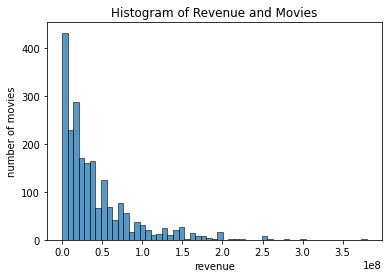

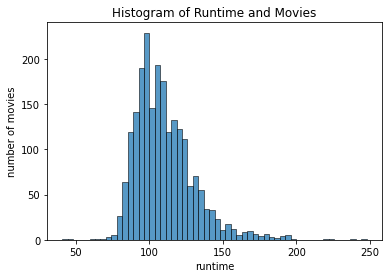

In [18]:
seaborn.histplot(df_train["budget"])
plt.xlabel('revenue')
plt.ylabel('number of movies')
plt.title('Histogram of Revenue and Movies')
plt.show()

seaborn.histplot(df_train["runtime"])
plt.xlabel('runtime')
plt.ylabel('number of movies')
plt.title('Histogram of Runtime and Movies')
plt.show()

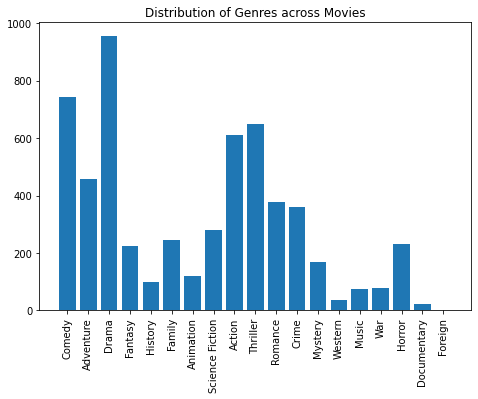

In [19]:
arr2 = df_train["genres"].values
from collections import Counter
c = Counter()
for xs in arr2:
    for x in set(xs):
        c[x] += 1
   
categories = []
vals = []
for i in c:
    categories.append(i)
    vals.append(c[i])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(categories,vals, label='genres')
ax.set_title('Distribution of Genres across Movies')
plt.xticks(rotation = 90)
plt.show()

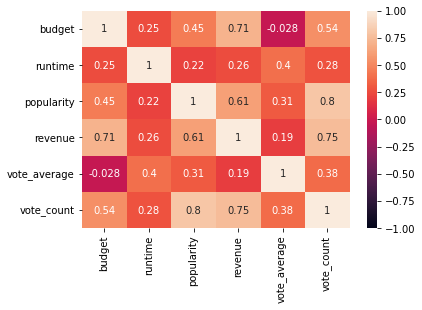

In [20]:
seaborn.heatmap(df_train.drop(columns=['Unnamed: 0', 'movie_id']).corr(), annot=True, vmin=-1, vmax=1)
plt.show()

## Preparing certain textual variables to use in the model

Many of the given features are textual. Here we illustrate a simple example of how the textual data could be used in your model to predict revenue. Specifically, we define two dummy variables for if a movie is directed by one of two high-profile directors.

In [21]:
df_train['MS_dummy'] = df_train['director'] == 'Martin Scorsese'
df_train['SS_dummy'] = df_train['director'] == 'Steven Spielberg'

df_test['MS_dummy'] = df_test['director'] == 'Martin Scorsese'
df_test['SS_dummy'] = df_test['director'] == 'Steven Spielberg'

In [22]:
df_train['MS_dummy'].sum(), df_train['SS_dummy'].sum()

(9, 19)

In [23]:
df_test['MS_dummy'].sum(), df_test['SS_dummy'].sum()

(1, 10)

We will evaluate two models, one which does not include these dummy variables and one which does.

## Creating and evaluating models

Here we provide a very simple example for modeling revenue. In order to analyze model performance, we suggest creating an additional validation set from the training data. We evaluate how good the model is based on the root mean squared log error (RMSLE) and $R^2$ value. If you predict negative numbers, you should threshold your predictions at 0 before calculating the RMSLE or you will get an error. When we evaluate your predictions, we will also be thresholding at 0, so it is okay to have negative values in your submission. 

In [24]:
# imports necessary packages for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error, r2_score

#### Without textual dummy variables

In [25]:
# creates your feature dataframe and outcome column
X = df_train[["budget", "runtime", "popularity"]]
y = df_train["revenue"]

# creates a training and validation set from the overall training data (20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# standardize features
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_val = scalar.transform(X_val)

# creates a random forest
rf = RandomForestRegressor(max_depth=7, random_state=0)

# fits the model
rf.fit(X_train, y_train)

# predicts outcomes for the training data
y_train_pred = rf.predict(X_train)

# calculates the RMSLE and R^2 for the training data
rf_train_rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
rf_train_r2 = r2_score(y_train, y_train_pred)
print("RF training: RMSLE \t= %f & R^2 \t= %f" % (rf_train_rmsle, rf_train_r2))

# predicts outcomes for the validation data (this is important to see how your
# model extends to unseen data)
y_val_pred = rf.predict(X_val)

# calculates the RMSLE and R^2 for the testing data
rf_val_rmsle = np.sqrt(mean_squared_log_error(y_val, y_val_pred))
rf_val_r2 = r2_score(y_val, y_val_pred)
print("RF validation: RMSLE \t= %f & R^2 \t= %f" % (rf_val_rmsle, rf_val_r2))

RF training: RMSLE 	= 1.238013 & R^2 	= 0.862452
RF validation: RMSLE 	= 1.343366 & R^2 	= 0.528730


#### With textual dummy variables

In [26]:
# creates your feature dataframe and outcome column
X = df_train[["budget", "runtime", "popularity", "MS_dummy", "SS_dummy"]]
y = df_train["revenue"]

# creates a training and validation set from the overall training data (20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# standardize features
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_val = scalar.transform(X_val)

# creates a random forest
rf2 = RandomForestRegressor(max_depth=7, random_state=0)

# fits the model
rf2.fit(X_train, y_train)

# predicts outcomes for the training data
y_train_pred = rf2.predict(X_train)

# calculates the RMSLE and R^2 for the training data
rf2_train_rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
rf2_train_r2 = r2_score(y_train, y_train_pred)
print("RF2 training: RMSLE \t= %f & R^2 = %f" % (rf2_train_rmsle, rf2_train_r2))

# predicts outcomes for the testing data (this is important to see how your
# model extends to unseen data)
y_val_pred = rf2.predict(X_val)

# calculates the RMSLE and R^2 for the testing data
rf2_val_rmsle = np.sqrt(mean_squared_log_error(y_val, y_val_pred))
rf2_val_r2 = r2_score(y_val, y_val_pred)
print("RF2 validation: RMSLE \t= %f & R^2 = %f" % (rf2_val_rmsle, rf2_val_r2))

RF2 training: RMSLE 	= 1.237834 & R^2 = 0.863595
RF2 validation: RMSLE 	= 1.342418 & R^2 = 0.532653


It appears that we can squeeze out marginal performance improvements by using the textual data! In fact, we suspect that the best models will use the textual features in creative ways to maximize performance.

#### Make sure to train on the entire training + validation set
Since the model was developed on a subset of the training data, you need to use all of the official training data to train the model that is submitted to the leaderboard.

In [27]:
# train new model on all of the training data that was provided
X = df_train[["budget", "runtime", "popularity", "MS_dummy", "SS_dummy"]]
y = df_train["revenue"]

rf_final = RandomForestRegressor(max_depth=7, random_state=0)
rf_final.fit(X, y)

RandomForestRegressor(max_depth=7, random_state=0)

## How to upload your output to EvalAI
The required submission format is a .csv file with two columns, *movie_id* and *predicted revenue*. You should submit a file like this when submitting to both the Public phase and Private phase of the competition on EvalAI.

In [28]:
# generate predictions on the official provided test set
X_test = df_test[["budget", "runtime","popularity", "MS_dummy", "SS_dummy"]]

# predict on the testing data
y_test_pred = rf_final.predict(X_test)

# get the movie ids and corresponding revenues you predicted and put in a new dataframe
results = df_test["movie_id"].copy()
results = pd.DataFrame(results)
results["predicted revenue"] = y_test_pred 

# convert dataframe into csv that you will submit to the leaderboard
results.to_csv(r'test_competition_entry.csv', index = False, header=True)

In [29]:
results

,movie_id,predicted revenue
0,152760,1.827386e+08
1,59981,4.392411e+07
2,2062,4.000401e+08
3,6957,1.163636e+08
4,2013,3.424931e+07
...,...,...
920,35019,8.676907e+07
921,71552,1.415909e+08
922,805,6.101585e+07
923,11283,6.785371e+07


You can now upload these predictions to EvalAI to see how well your model performs against other models.

## Good luck!